# Machine Learning

## Modulo 2 - SVM

### Import dei moduli necessari

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import  GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

## Lettura del Dataset

In [2]:
csv_file = 'winequality-red.csv'
df = pd.read_csv(csv_file, sep=";")
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Da una rapida osservazione della struttura del dataset, non sembrano essere necessarie particolari attenzioni o correzioni. Si osserva inoltre che la qualità assume un valore minimo di 3 un massimo di 8.

### Studio delle variabili

Si studia la correlazione che sussiste tra le variabili.

<AxesSubplot:>

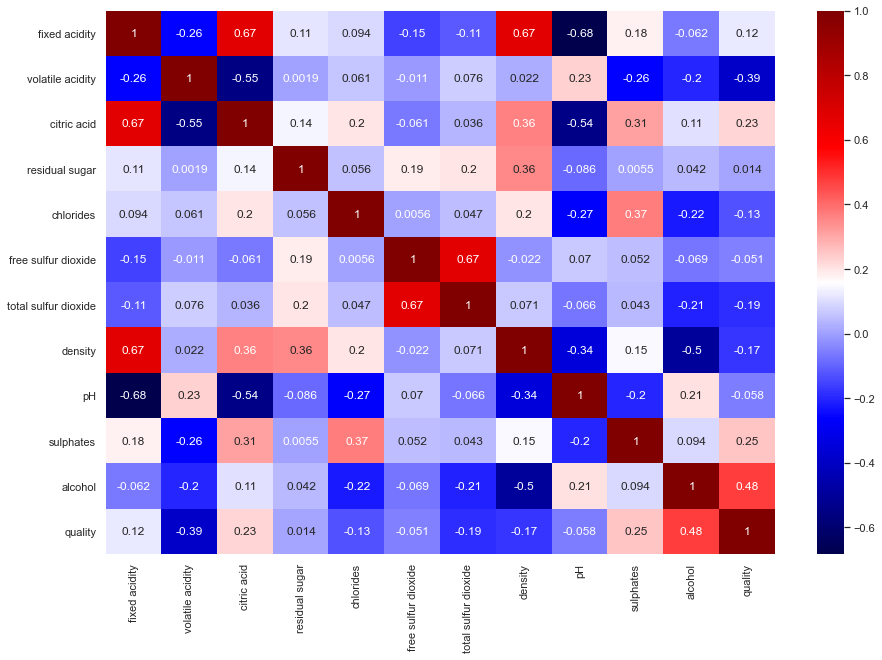

In [3]:
corr = df.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr, cmap='seismic', annot=True)

**Osservazioni**
- La qualità è direttamente proporzionale al grado alcolico e, in minor misura, ai solfati e all’acido citrico;
- La qualità è inversamente proporzionale all’acidità volatile al diossido di sulfuro libero;
- La qualità è scarsamente correlata ai restanti parametri;

Di seguito si può effettuare un'eventuale riduzione delle variabili valutando esclusivamente il coefficiente di correlazione (di default settato a **False**)

In [4]:
var_reduce = False

if var_reduce:
    i=0
    thres = 0.10
    while i < len(df.corr()):
        d = df.corr().iloc[i,-1:]
        if d[0] > -thres and d[0] < thres:
            df = df.drop(df.columns[i], axis=1)
        else:
            i+=1

### Training e Testing del modello
Vengono adesso estratte le variabili esplicative e la variabile di risposta, quindi si suddivide il dataset in:
- un *training set* (**80%** del set iniziale);
- un *test test* (**20%** rimanente).

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Si allena adesso il modello utilizzando il training set e si calcola la sua accuratezza mediante **K-fold cross-validation** (K = 10) e **kernel Radial Basis "RBF"**.

La funzione in particolare implementa la funzione *GridSearchCV*. I metodi di questa funzione sono **fit**, **predict** e **score** utilizzati rispettivamente per allenare il modello, effettuare previsioni e valutare l'accuratezza.

La funzione valuta il miglior stimatore, ovvero quello che massimizza l'accuratezza mediante una ricerca cross-validata in funzione della lista di parametri trasmessa (*c_params*).

In [6]:
model = SVC(kernel='rbf')
crossValidationModel = KFold(n_splits = 10)

# Parametri
c_params = {"C": [10, 100, 1000, 10000, 100000]}

'''
La funzione GridSearchCV riceve in input i seguenti dati.
- Lo stimatore
- La lista di parametri (come dict)
- Il metodo di ottimizzazione delle performance (in questo l'ottmizzazione dell'accuratezza')
- Il generatore della cross-validation
'''
gridSearch = GridSearchCV(estimator = model, param_grid = c_params, scoring='accuracy', refit=True, cv=crossValidationModel)

# Training del modello
searchResult = gridSearch.fit(X_train, y_train.ravel())

# Ricerca del miglior modello
best_model = searchResult.best_estimator_
best_c = gridSearch.best_params_['C']

# Test del modello
y_pred = best_model.predict(X_test)

# Visualizzazione dell'accuratezza
acc = accuracy_score(y_test, y_pred)
print(f'Il modello stimato presenta un\'accuracy pari al {round(acc*100,2)}% utilizzando il parametro c = {best_c}')

Il modello stimato presenta un'accuracy pari al 63.44% utilizzando il parametro c = 10000


### Risultati
Non essendo possibile visualizzare i risultati in un piano a causa dell'elevato numero di classi, si visualizzano i risultati ottenuti mediante una **confusion matrix**.

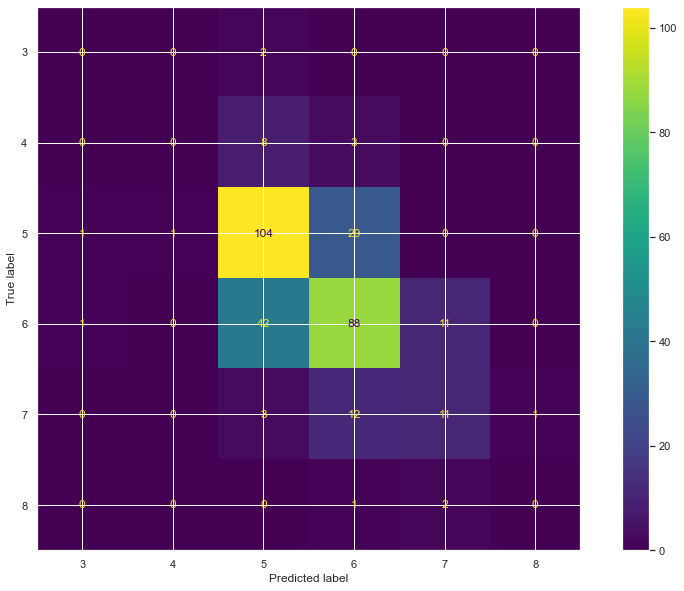

In [7]:
labels  = ["3","4","5","6","7","8"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()
plt.show()